### Question 1: Perform the clustering 

Following is a part of data from Happy Planet Index website, which provides some information about the 65 countries in 2016. 

In [1]:
import pandas as pd

data = pd.read_csv("happyplanet2016.csv")
print(data.head())

C:\Users\hafid\anaconda3\envs\ds\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\hafid\anaconda3\envs\ds\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\hafid\anaconda3\envs\ds\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


      Country        Region  Life_Expectancy  Well_Being  Happy_Life_Years  \
0  Costa Rica      Americas           79.076         7.3         48.174792   
1      Mexico      Americas           76.411         7.3         44.262083   
2    Colombia      Americas           73.673         6.4         35.070893   
3     Vietnam  Asia Pacific           75.477         5.5         32.770246   
4      Panama      Americas           77.215         6.9         42.076665   

   Environmental_Footprint  Inequality  HappyPlanetIndex        GDP_PC  \
0                     2.84    0.145568         44.714071   9733.396931   
1                     2.89    0.187699         40.697292   9703.371017   
2                     1.87    0.235044         40.695011   7885.061292   
3                     1.65    0.185921         40.307589   1754.547974   
4                     2.79    0.189979         39.502577  10138.521129   

   Population  GINIindex  
0     4654148      48.61  
1   122070963      48.07  
2    

1. Use the country names as the labels. Remove the Region information, then perfrom a Hierarchical clustering with ward linkage. Plot the dendrogram. (20)

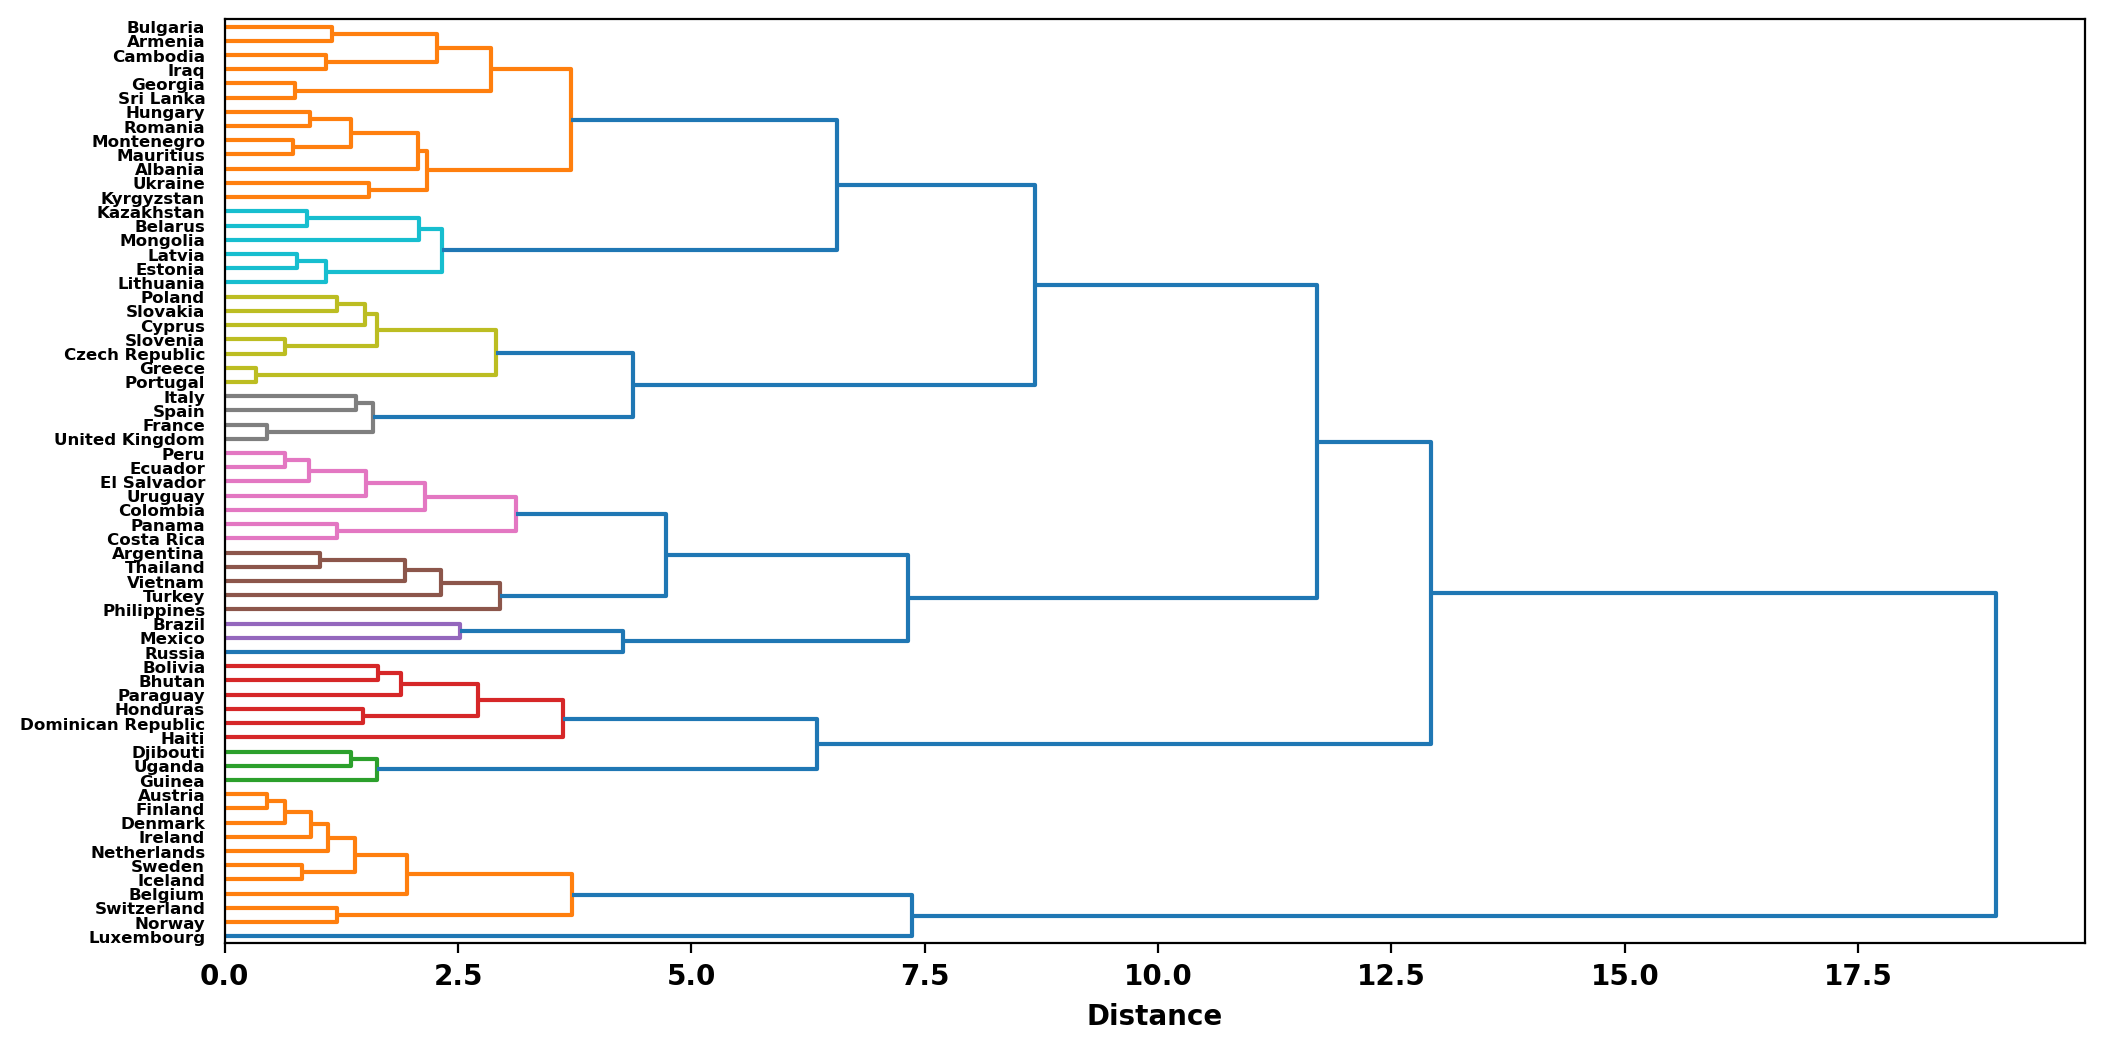

In [2]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

countries = data.Country
X = data.drop(columns=['Country', 'Region'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

linkage_matrix = linkage(X_scaled, method='ward')
plt.figure(figsize=(12, 6), dpi=200)
dendrogram(linkage_matrix, labels=countries.values, orientation='right', color_threshold=4)
plt.xlabel('Distance')
plt.show()

2. Show another dendrogram with complete linkage. Choose a cluster number to color the plot. (5)

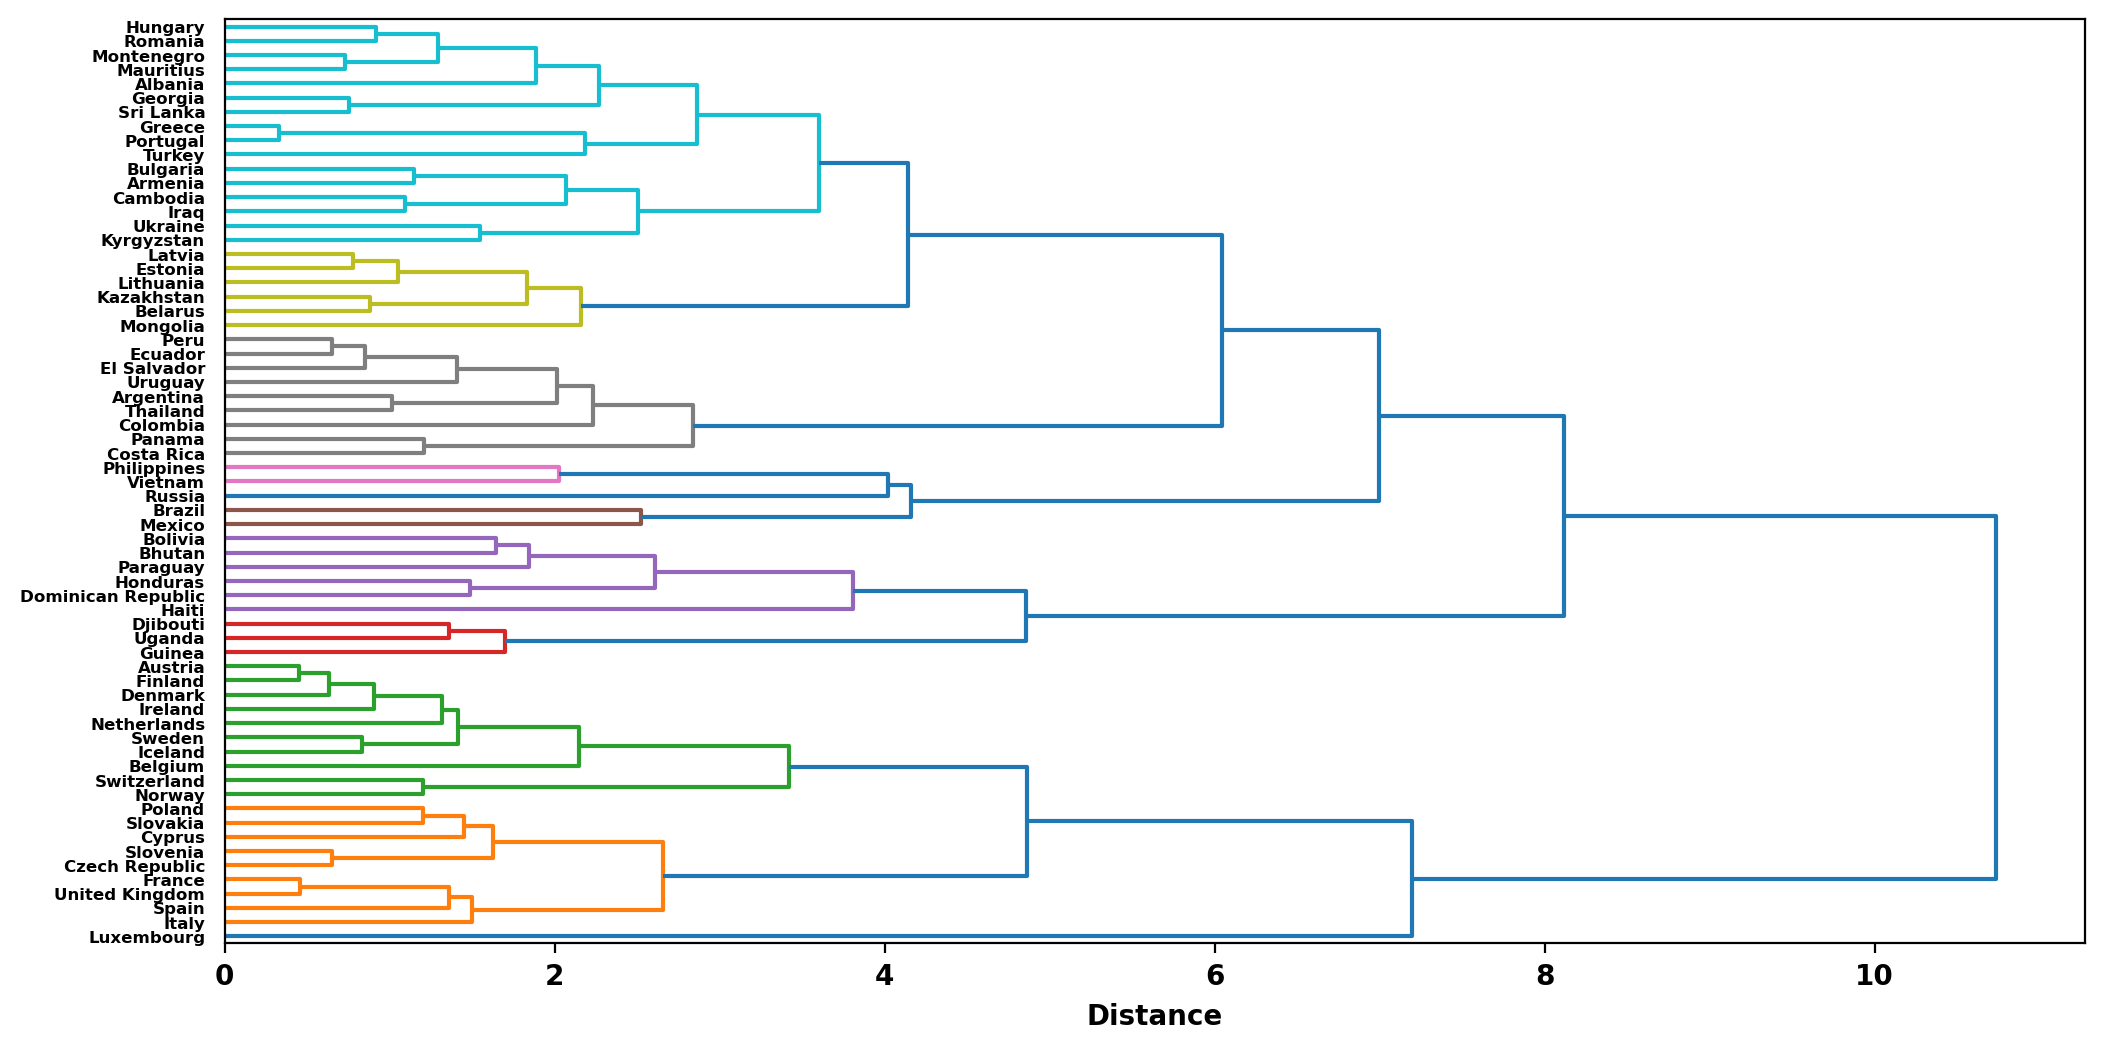

In [3]:
linkage_matrix = linkage(X_scaled, method='complete')
plt.figure(figsize=(12, 6), dpi=200)
dendrogram(linkage_matrix, labels=countries.values, orientation='right', color_threshold=4)
plt.xlabel('Distance')
plt.show()

3. Perform the k-means clustering. Use the same cluster number in the previous question. Plot the clustering with "HappyPlanetIndex" and "Life_Expectancy". (20)

C:\Users\hafid\anaconda3\envs\ds\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


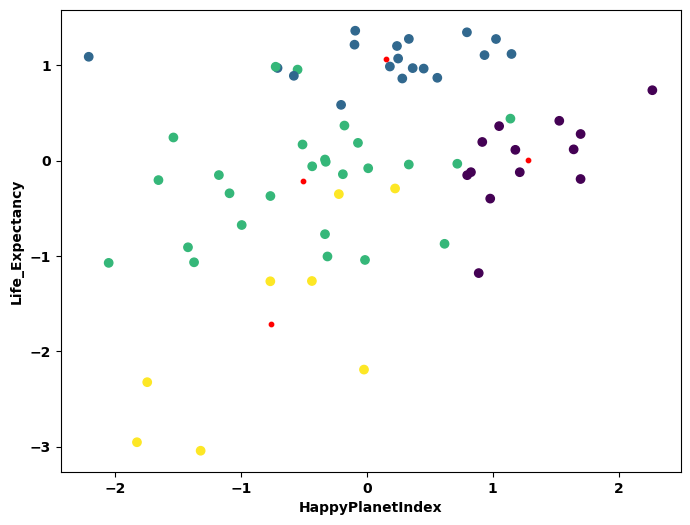

In [4]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=4400)
kmeans_labels = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_scaled[:,5], X_scaled[:,0], c=kmeans_labels)
plt.scatter(kmeans.cluster_centers_[:,5], kmeans.cluster_centers_[:,0], s=10, c='red')
plt.xlabel('HappyPlanetIndex')
plt.ylabel('Life_Expectancy')
plt.show()

### Question 2: Perform the PCA 

1. Use the same data from Question 1. Remove the "HappyPlanetIndex" since it is a linear combination of all the other variables. Perform the PCA and plot the explained variance ratio for PCs. (20)

In [5]:
from sklearn.decomposition import PCA

y = X['HappyPlanetIndex']
X.drop(columns=['HappyPlanetIndex'], inplace=True)
feature_names = list(X.columns)

<BarContainer object of 8 artists>

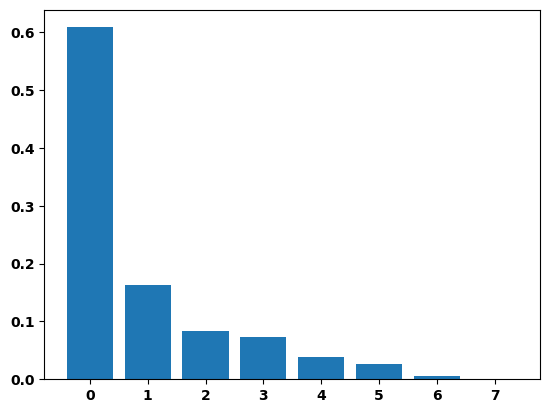

In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

eigenvalues_scaled = pca.explained_variance_ratio_
eigenvalues = pca.explained_variance_

plt.bar(range(len(eigenvalues_scaled)), eigenvalues_scaled)

2. Use the code in the code demonstration and plot the bi-plot for the PCA. Discuss how the features are related with each other. (10)

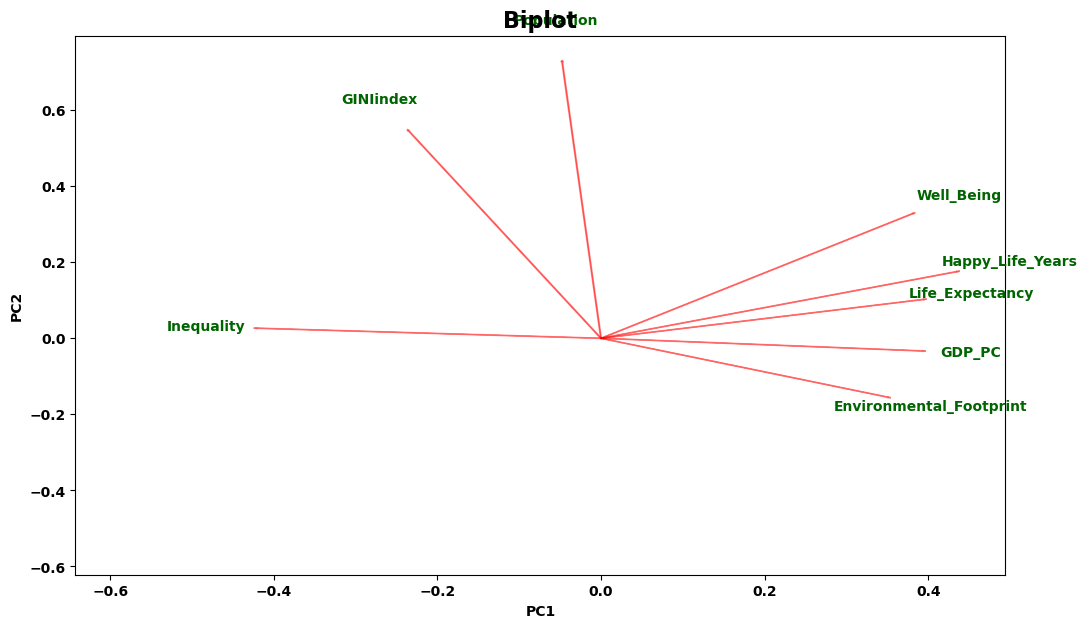

In [7]:
import numpy as np

def biplot(score,coef,labels=None):
 
    n = coef.shape[0]
    scalex = 1.0/(PC1.max() - PC2.min())
    scaley = 1.0/(PC1.max() - PC2.min())
 
    plt.scatter(PC1 * scalex,
                PC2 * scaley, c = 'w')
 
    for i in range(n):
        plt.arrow(0, 0, 
                  coef[i,0], 
                  coef[i,1],
                  color = 'red',
                  alpha = 0.5)
 
        plt.text(coef[i,0]* 1.15, 
                 coef[i,1] * 1.15, 
                 labels[i], 
                 color = 'darkgreen', 
                 ha = 'center', 
                 va = 'center')
 
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    
PC1 = pca.components_[:,0]
PC2 = pca.components_[:,1]    
    
plt.figure(figsize=(12,7))
plt.title("Biplot",
          fontsize=16)
biplot(pca, np.transpose(pca.components_), feature_names)

We see that "Inequality", "Environmental_Footprint", "GDP_PC", "Life_Expectancy", and "Happy_Life_Years" contribute more to the first principal component since their lines are more horizontal. On the other hand, the other remaining features contribute more to the second component since their lines are more vertical. Moreover, we observe that "Well_Being", "Happy_Life_Years", "Life_Expectancy", "GDP_PC", and "Environmental_Footprint" are correlated features since their lines are in the same direction and they're close to each other. Similarly, "GINIindex" and "Population" are correlated. Lastly, since the lines of "Inequality" and "GDP_PC" are in opposite directions, we can say these features are negatively correlated.

3. Fit a linear regression with the first three PCs and report the MSE. (10)

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

y = np.array(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4400)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
lm_pca = LinearRegression()
lm_pca.fit(X_train_pca, y_train)
y_pred_pca = lm_pca.predict(X_test_pca)
mse_pca = mean_squared_error(y_test, y_pred_pca)
print("Linear Regression (with PCA) MSE: ", mse_pca)

lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)
y_preds = lin_reg.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_preds)
print("Linear Regression (no PCA) MSE: ", mse)

Linear Regression (with PCA) MSE:  39.14361043091887
Linear Regression (no PCA) MSE:  11.118366869885907


### Question 3: Compare the clustering methods

1. Discuss the difference between Hierarchical clustering and kmeans clustering. Please list at least three differences. (10) 

**Number of Clusters:**
- **K-Means**: Requires you to specify the number of clusters (k) beforehand. It tries to group the data into k clusters based on the mean of data points.
- **Hierarchical Clustering:** Does not require you to predefine the number of clusters. It builds a hierarchy of clusters,
creating a tree-like structure, and you can choose the number of clusters later by cutting the tree at a certain level.

**Cluster Shape:**
- **K-Means:** Assumes that clusters are spherical and equally sized. It assigns each data point to the nearest cluster center.
- **Hierarchical Clustering:** Does not assume any specific shape for clusters. It builds clusters in a nested, tree-like structure, and they can be of different shapes and sizes.


**Process of Clustering:**
- **K-Means:** Involves an iterative process. It starts with random cluster centers, assigns points to the nearest center, updates the center based on the assigned points, and repeats until convergence.
- **Hierarchical Clustering:** Builds clusters incrementally. It can start with each data point as its own cluster and then merge clusters based on their similarity, creating a hierarchy of clusters.

2. Please summarize the pros and cons for using PCA instead of original data. (5)

**Pros:**
- PCA is primarily used for dimensionality reduction. It transforms the original features into a new set of uncorrelated variables (principal components) that capture most of the variance in the data. This can significantly reduce the number of features while retaining essential information.
- PCA facilitates data visualization by reducing the data to a lower-dimensional space (e.g., 2D or 3D). This can make it easier to explore and understand the structure of the data.

**Cons:**
- The principal components generated by PCA are linear combinations of the original features. As a result, the interpretability of the transformed features may be reduced, making it challenging to relate them back to the original variables.
- PCA assumes a linear relationship between the original features. If the underlying relationships in the data are nonlinear, PCA may not be as effective, and other dimensionality reduction techniques might be more suitable.